In [5]:
#EE224 Midterm
#Author: Kapil Dheeriya
#May 19, 2023
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.linalg as la
import math
from mpl_toolkits.axes_grid1 import AxesGrid
pi = np.pi
sq2 = np.sqrt(2)

In [2]:

#import pauli matrix code from PSet 1
pauli = np.array((((0, 1), (1, 0)), ((0, -1j), (1j, 0)), ((1, 0), (0, -1))))
I2 = np.eye(2)
a = np.zeros((2**5,2**5))
def paulilist(n: int, m: int):
    s=[]
    for i in range(1,m+1):
        mat = pauli[n-1] if i == 1 else I2
        for j in range(1,m):
            if i==j+1:
                mat = np.kron(mat, pauli[n-1])
            else: 
                mat = np.kron(mat, I2)
        s.append(mat)
    return s

px=paulilist(1,2)
py=paulilist(2,2)
pz=paulilist(3,2)

2 Rabi oscillation in the presence of strong interaction

Part B

In [7]:
ee = np.array([1,0,0,0])
ge = np.array([0,1,0,0])
eg = np.array([0,0,1,0])
gg = np.array([0,0,0,1])
psiplus = (1/sq2)*(eg+ge)

In [27]:
#Compute Hamiltonian in basis of ee, eg, ge, gg:
I4 = np.identity(4)
def H(omega, V):
    return (omega/2)*(px[0]+px[1]) + (V/4)*(I4+pz[0])@(I4+pz[1])

#Construct fidelity function
def F(psi):
    return (np.linalg.norm(np.vdot(psiplus, psi)))**2

#Free evolution
def psi(t, psi0, H_):
    U = la.expm(-1j*H_*t)
    return U@psi0

#Plot
def plotF(time, fdata, V):
    fig, ax  = plt.subplots()
    ax.plot(time, fdata, label = f'V/$\Omega$ = {V}')
    ax.set(xlabel='Time ($\Omega$t/2$\Pi$)', ylabel='F(t)',
       title='Fidelity of Rabi Oscillation in the Presence of Strong Interaction')
    ax.grid()
    ax.legend()


Predicted maximum Bell state fidelity for V/Ω = 5:   0.975
Numerical maximum Bell state fidelityfor V/Ω = 5:   0.9798803386479591
Predicted maximum Bell state fidelity for V/Ω = 10:   0.99375
Numerical maximum Bell state fidelityfor V/Ω = 10:   0.9944257300730984
Predicted maximum Bell state fidelity for V/Ω = 20:   0.9984375
Numerical maximum Bell state fidelityfor V/Ω = 20:   0.9985058914167598
Predicted maximum Bell state fidelity for V/Ω = 40:   0.999609375
Numerical maximum Bell state fidelityfor V/Ω = 40:   0.9996185265565316


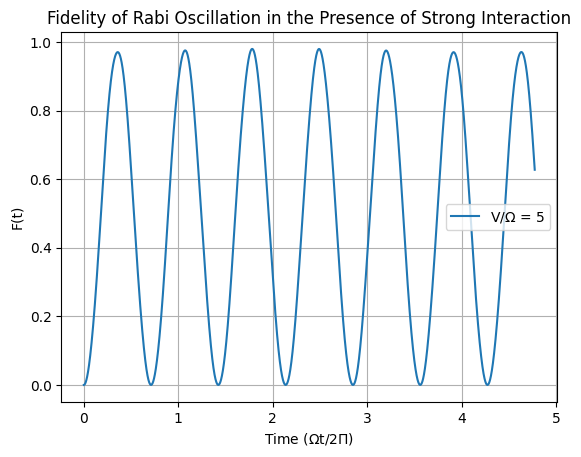

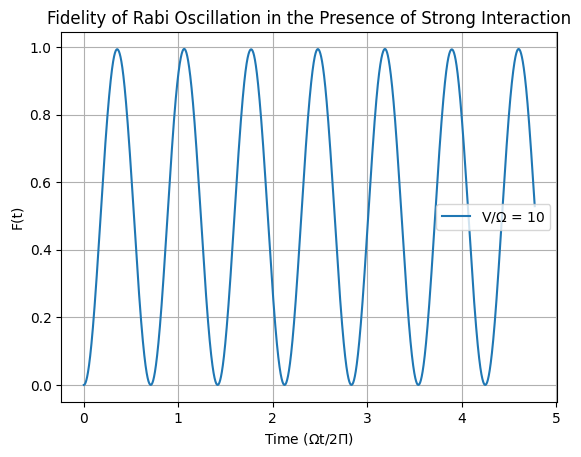

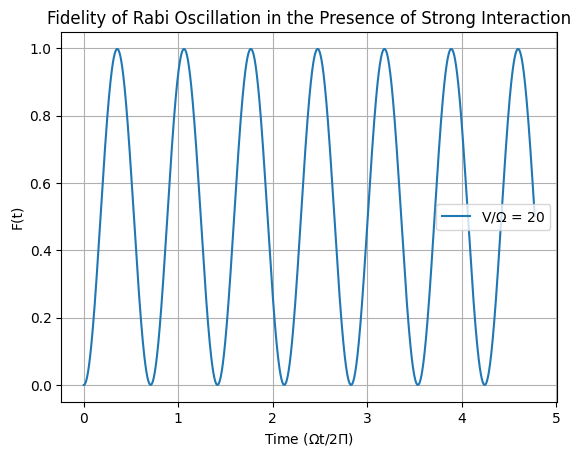

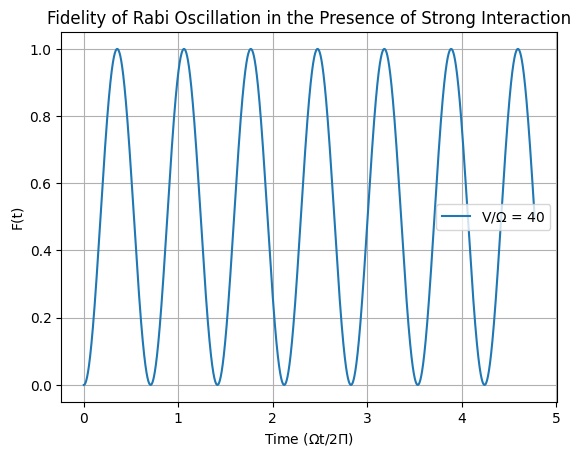

In [32]:
#Set Omega = 1
Vs = [5,10,20,40]
t = np.linspace(0, 30, 100001)
for V in Vs:
    H1 = H(1, V)
    fdata = []
    for time in t:
        fdata.append(F(psi(time, gg, H1)))
    plotF(t/(2*pi), fdata, V)
    fpred = 1 - (5/8)*(1/V)**2
    fmax = max(fdata)
    print(f'Predicted maximum Bell state fidelity for V/Ω = {V}:   {fpred}')
    print(f'Numerical maximum Bell state fidelityfor V/Ω = {V}:   {fmax}')
    